In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-case-surveillance-public-use-dataset/COVID-19_Case_Surveillance_Public_Use_Data.csv


### Load the data

In [2]:
df = pd.read_csv('../input/covid19-case-surveillance-public-use-dataset/COVID-19_Case_Surveillance_Public_Use_Data.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [4]:
df.shape

(8405079, 11)

Dropping the date columns and then the null values from dataset

In [5]:
df = df.drop(['pos_spec_dt','onset_dt'],axis =1)

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

cdc_report_dt                    0
current_status                   0
sex                              0
age_group                        0
Race and ethnicity (combined)    0
hosp_yn                          0
icu_yn                           0
death_yn                         0
medcond_yn                       0
dtype: int64

In [8]:
df.shape

(8404990, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8404990 entries, 0 to 8405078
Data columns (total 9 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   current_status                 object
 2   sex                            object
 3   age_group                      object
 4   Race and ethnicity (combined)  object
 5   hosp_yn                        object
 6   icu_yn                         object
 7   death_yn                       object
 8   medcond_yn                     object
dtypes: object(9)
memory usage: 641.2+ MB


In [10]:
colums = ['current_status', 'sex', 'age_group', 'Race and ethnicity (combined)', 'hosp_yn','icu_yn', 'death_yn', 'medcond_yn']
for col in colums:
    print(col)
    print(df[colums].value_counts())
    print("______________________")

current_status
current_status             sex      age_group      Race and ethnicity (combined)  hosp_yn  icu_yn   death_yn  medcond_yn
Laboratory-confirmed case  Female   20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       106485
                           Male     20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       103285
                                    30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        88420
                           Female   30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        85402
                                    40 - 49 Years  Unknown                        Missing  Missing  Missing   Missing        79194
                                                                                                                             ...  
                           Unknown  10 - 19 Years  White, Non-Hispanic        

In [11]:
df.describe().T

,count,unique,top,freq
cdc_report_dt,8404990,321,2020/06/24,155856
current_status,8404990,2,Laboratory-confirmed case,7910037
sex,8404990,5,Female,4340898
age_group,8404990,10,20 - 29 Years,1635264
Race and ethnicity (combined),8404990,9,Unknown,2781165
hosp_yn,8404990,4,No,3502508
icu_yn,8404990,4,Missing,6178240
death_yn,8404990,4,No,3690765
medcond_yn,8404990,4,Missing,6063360


In [12]:
#Unique values in data
df.nunique()

cdc_report_dt                    321
current_status                     2
sex                                5
age_group                         10
Race and ethnicity (combined)      9
hosp_yn                            4
icu_yn                             4
death_yn                           4
medcond_yn                         4
dtype: int64

## Some Interesting Insights from Visualization

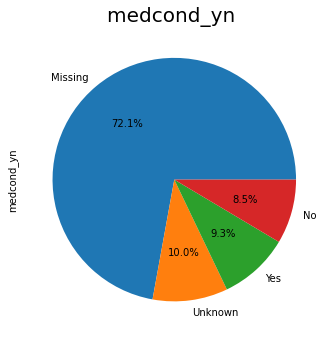

In [13]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('medcond_yn ',fontsize = 20)
df['medcond_yn'].value_counts().plot.pie(autopct="%1.1f%%")

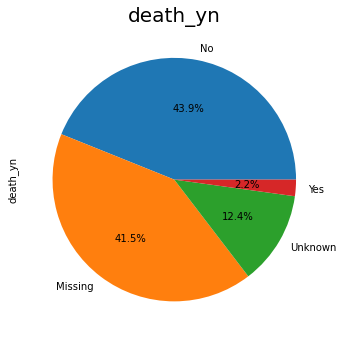

In [14]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('death_yn',fontsize = 20)
df['death_yn'].value_counts().plot.pie(autopct="%1.1f%%")

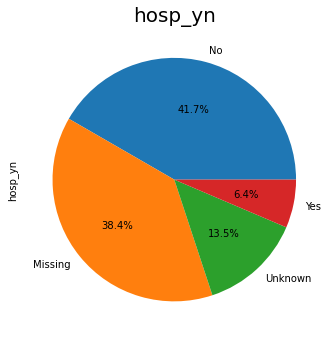

In [15]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('hosp_yn',fontsize = 20)
df['hosp_yn'].value_counts().plot.pie(autopct="%1.1f%%")

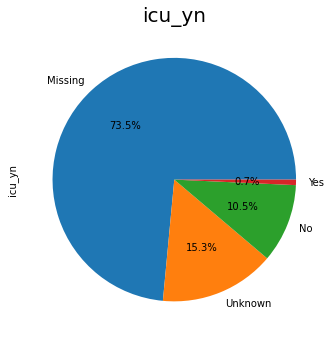

In [16]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('icu_yn',fontsize = 20)
df['icu_yn'].value_counts().plot.pie(autopct="%1.1f%%")

From the above pie charts we can see there are lot of missing data to conclude.

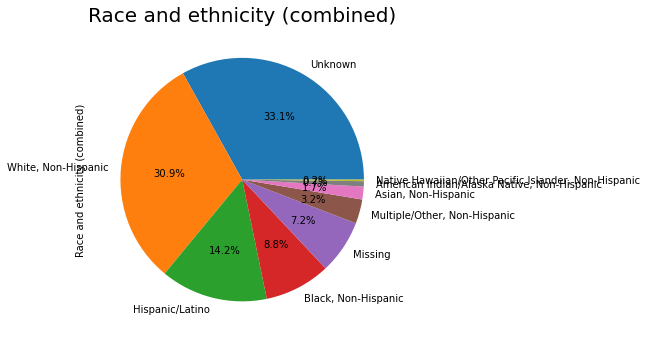

In [17]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Race and ethnicity (combined)',fontsize = 20)
df['Race and ethnicity (combined)'].value_counts().plot.pie(autopct="%1.1f%%")

Pie chart on the basis of Ethnicity/Race

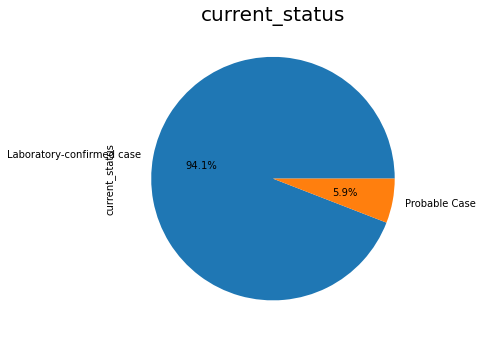

In [18]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('current_status',fontsize = 20)
df['current_status'].value_counts().plot.pie(autopct="%1.1f%%")

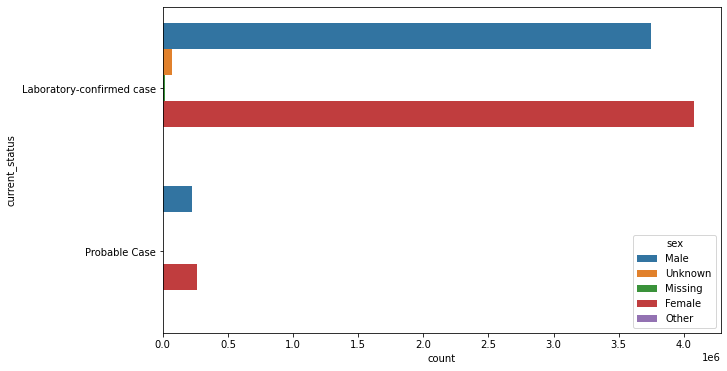

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(y="current_status",hue ='sex',data=df)

Medical condition with respect to gender, while we have lot of missing data

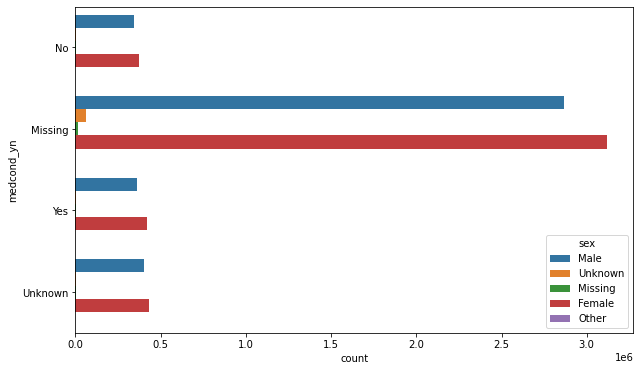

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(y="medcond_yn",hue ='sex',data=df)

Death ratio of male and female are same, while missing rate is highest

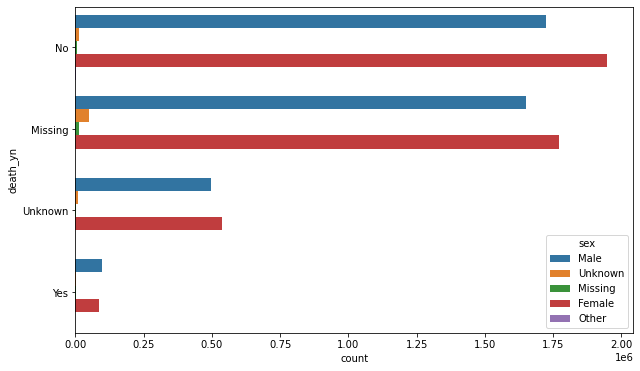

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(y="death_yn",hue ='sex',data=df)

Age group from 20-29 has the highest count

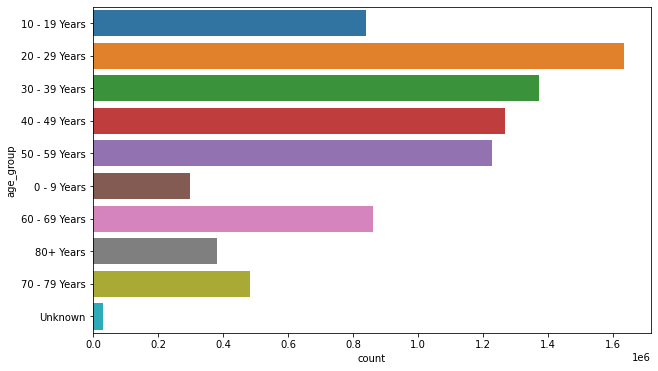

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(y="age_group",data=df)

Age Group with respect to their gender.

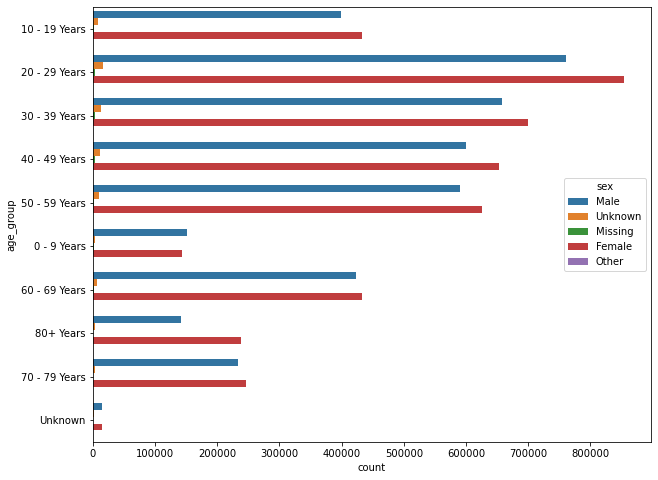

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(y="age_group",hue ='sex',data=df)

<Figure size 720x576 with 0 Axes>

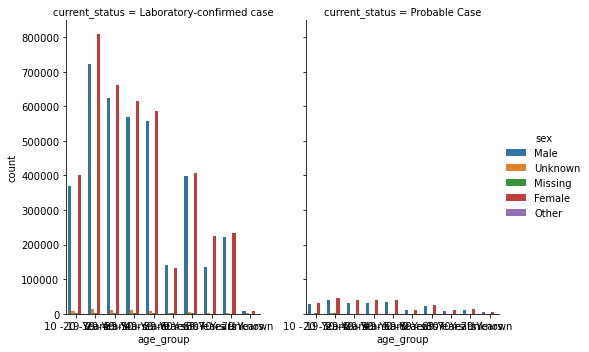

In [24]:
plt.figure(figsize=(10,8))
sns.catplot(x="age_group", hue="sex", col="current_status", data=df, kind="count", height=5, aspect=.7);

In [25]:
print("Start Date:", df['cdc_report_dt'].min())
print("End Date:", df['cdc_report_dt'].max())

Start Date: 2020/01/01
End Date: 2020/11/19


In [26]:
df['age_group'].value_counts()

20 - 29 Years    1635264
30 - 39 Years    1372623
40 - 49 Years    1267350
50 - 59 Years    1227493
60 - 69 Years     863260
10 - 19 Years     841450
70 - 79 Years     483689
80+ Years         382869
0 - 9 Years       299040
Unknown            31952
Name: age_group, dtype: int64

## Data Preparation For Model

In [27]:
data = df.copy()

In [28]:
data['sex'].value_counts()

Female     4340898
Male       3970591
Unknown      73838
Missing      19508
Other          155
Name: sex, dtype: int64

### Converting categorical feature to numeric

In [29]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

Converting a categorical feature
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=0 and male=1 and so on.

In [30]:
# mapp = {'Female':1,'Male':2,'Unknown':3,'Missing':4,'Other':5}
# data['sex'] = data['sex'].apply(lambda x:mapp[x])

data['sex'] = data['sex'].map({'Female':0,'Male':1,'Unknown':2,'Missing':3,'Other':4})
print(data.head())

  cdc_report_dt             current_status  sex      age_group  \
0    2020/11/10  Laboratory-confirmed case    1  10 - 19 Years   
1    2020/11/14  Laboratory-confirmed case    1  10 - 19 Years   
2    2020/11/19  Laboratory-confirmed case    1  10 - 19 Years   
3    2020/11/14  Laboratory-confirmed case    1  10 - 19 Years   
4    2020/11/13  Laboratory-confirmed case    1  10 - 19 Years   

  Race and ethnicity (combined)  hosp_yn   icu_yn death_yn medcond_yn  
0           Black, Non-Hispanic       No  Unknown       No         No  
1           Black, Non-Hispanic       No       No       No         No  
2           Black, Non-Hispanic       No       No       No         No  
3           Black, Non-Hispanic  Missing  Missing       No    Missing  
4           Black, Non-Hispanic       No       No       No        Yes  


In [31]:
data["current_status"] = lb_make.fit_transform(data["current_status"])
data["hosp_yn"] = lb_make.fit_transform(data["hosp_yn"])
data["icu_yn"] = lb_make.fit_transform(data["icu_yn"])
data["death_yn"] = lb_make.fit_transform(data["death_yn"])
data["medcond_yn"] = lb_make.fit_transform(data["medcond_yn"])

In [32]:
data.head()

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,0,1,10 - 19 Years,"Black, Non-Hispanic",1,2,1,1
1,2020/11/14,0,1,10 - 19 Years,"Black, Non-Hispanic",1,1,1,1
2,2020/11/19,0,1,10 - 19 Years,"Black, Non-Hispanic",1,1,1,1
3,2020/11/14,0,1,10 - 19 Years,"Black, Non-Hispanic",0,0,1,0
4,2020/11/13,0,1,10 - 19 Years,"Black, Non-Hispanic",1,1,1,3


In [33]:
data.shape

(8404990, 9)

In [34]:
X =  data[['current_status','hosp_yn','icu_yn','medcond_yn','sex']]
y = data['death_yn']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model Building with Logistic Regression and Decision Tree:

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution

In [36]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

73.29

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

The model confidence score is the highest among models evaluated so far.

In [37]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

78.07

#### Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Logisitic Regression score the different, we choose to use Decision Tree, habit of overfitting to their training set.

In [38]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Score': [ acc_log, acc_decision_tree]})
sorted_model=models.sort_values(by='Score', ascending=False)
sorted_model

,Model,Score
1,Decision Tree,78.07
0,Logistic Regression,73.29


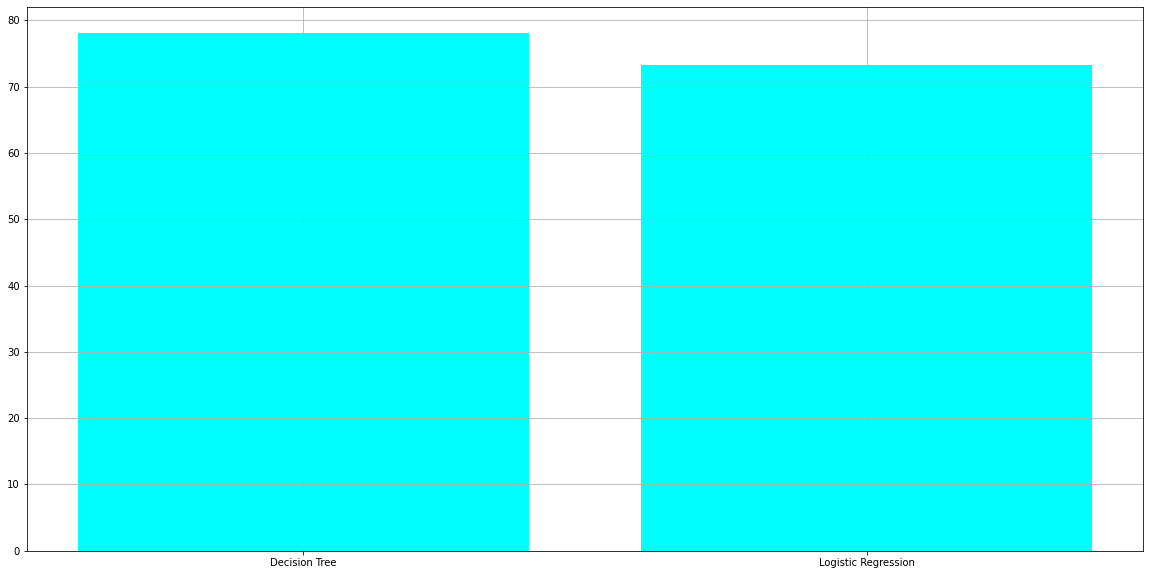

In [39]:
plt.figure(figsize=(20,10))
fig = plt.bar(sorted_model['Model'], sorted_model['Score'],color='aqua')
plt.grid()
plt.show()

## Can Try with below Models as well.

In [40]:
# # Logistic Regression

# logreg = LogisticRegression()
# logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
# acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
# acc_log

# # Support Vector Machines

# svc = SVC()
# svc.fit(X_train, Y_train)
# Y_pred = svc.predict(X_test)
# acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
# acc_svc


# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(X_train, Y_train)
# Y_pred = knn.predict(X_test)
# acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
# acc_knn

# # Gaussian Naive Bayes

# gaussian = GaussianNB()
# gaussian.fit(X_train, Y_train)
# Y_pred = gaussian.predict(X_test)
# acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
# acc_gaussian


# # Perceptron

# perceptron = Perceptron()
# perceptron.fit(X_train, Y_train)
# Y_pred = perceptron.predict(X_test)
# acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
# acc_perceptron



# # Linear SVC

# linear_svc = LinearSVC()
# linear_svc.fit(X_train, Y_train)
# Y_pred = linear_svc.predict(X_test)
# acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
# acc_linear_svc


# # Stochastic Gradient Descent

# sgd = SGDClassifier()
# sgd.fit(X_train, Y_train)
# Y_pred = sgd.predict(X_test)
# acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
# acc_sgd


# # Decision Tree

# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train, Y_train)
# Y_pred = decision_tree.predict(X_test)
# acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
# acc_decision_tree


# # Random Forest

# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_train, Y_train)
# Y_pred = random_forest.predict(X_test)
# random_forest.score(X_train, Y_train)
# acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
# acc_random_forest

# models = pd.DataFrame({
#     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
#               'Random Forest', 'Naive Bayes', 'Perceptron', 
#               'Stochastic Gradient Decent', 'Linear SVC', 
#               'Decision Tree'],
#     'Score': [acc_svc, acc_knn, acc_log, 
#               acc_random_forest, acc_gaussian, acc_perceptron, 
#               acc_sgd, acc_linear_svc, acc_decision_tree]})
# sorted_model=models.sort_values(by='Score', ascending=False)
# sorted_model


In [41]:
# submission = pd.DataFrame({
#         "PatientId": test_df["patient"],
#         "death_yn": Y_pred
#     })
# submission.to_csv('submission2.csv', index=False)

### Please upvote, if it helps :)